<h1><center><u> Projets Maths </u></center></h1>

<h5><center> Paul Mazeau, Victorien Leconte, Théo Le Moal</center></h5>

<h2><center><u>1. Sujet </u></center></h2>

<p style="text-align:justify;">L’objectif est de modéliser un marché financier et de déterminer le prix et la couverture d’options européennes. Le marché financier est composé de deux actifs que l’on peut échanger à un prix fixé par le marché :</p>
 <ul>
    <li>un actif que l’on appelle sans risque connu dès l’instant initial 0 (ce prix est une variable aléatoire déterministe),</li>
    <li>un actif risqué dont le prix St à l’instant t est une variable aléatoire (typiquement une action), dont on modélisera la loi par la suite.</li>
    </ul>

<p style="text-align:justify;">
Un investisseur souhaite acheter à l’instant initial une option européenne qui lui rapportera la valeur $f (S_T )$ à l’instant $T$ , où la fonction $f : R+ → R+$ est continue (c’est une fonction qui prend en argument la valeur
de l’actif risqué à l’instant $T$ ). Afin de déterminer le prix que doit faire payer le vendeur à l’instant initial à
cet investisseur nous utiliserons des outils probabilistes.
Nous souhaitons également déterminer la couverture que doit mettre en place le vendeur pour couvrir ses risques. La couverture correspond à la façon dont le vendeur investit dynamiquement l’argent qu’il reçoit à l’instant initial dans le marché pour qu’à l’instant $T$ il ait
exactement $f (S_T )$ à donner à l’acheteur du contrat sachant qu’à l’instant initial il n’a que ce qu’il reçoit de la
1 de la part de l’investisseur et qu’il ne rajoute jamais d’argent de sa poche et qu’il ne prend jamais d’argent pour lui.
En resumé on cherche la proportion d’argent investie dans l’actif risqué et la proportion d’argent investie dans
l’actif sans risque à n’importe quelle date pour qu’à la date $T$ , lorsqu’on vend tout pour récupérer du cash, le
vendeur ait exactement la somme $f (S_T )$.
Pour résoudre ce problème nous modéliserons dans un premier temps l’évolution des prix de manière discrète
avec une progression par arbre en suivant le modèle de Cox-Ross-Rubinstein, puis dans un second temps nous
modéliserons l’évolution des prix de manière continue avec le modèle de Black-Scholes. Dans un troisième temps
nous étudierons la convergence du prix donné par le modèle de Cox-Ross-Rubinstein vers celui donné par le
modèle de Black-Scholes.</p>

<h2><center><u>2. Modèle de Cox-Ross-Rubinstein (binomial)</u></center></h2>

<h5><u>Question 1</u></h5>

<p style="text-align:justify;">
On recherche $Q$ la probabilité risque-neutre tel que $E_{Q}(T_{1}^{(N)}) = 1 + r_{N}$. Pour cela on va développer l'ésperance, sachant que les variables aléatoires $T_{i}^{N}$ prennent la valeur $1 + h_{N}$ avec la probabilité $q_{N}$ et la valeur $ 1 + b_{N}$ avec la probabilité $ 1 - q_{N}$<br/>
    On a donc : <br/>
    <center>$E_{Q}(T_{1}^{(N)} = (1 + h_{N})q_{N} + (1 + b_{N})(1 - q_{N})$ <br/>
        = $1 + r_{N}$</center>
<br/>
On isole ensuite $q_{N}$ et on trouve alors : 
<br/>
    <center> $q_{N} = \frac{r_{N} - b_{N}}{h_{N} - b_{N}}$</center>
    

</p>


<h5><u>Question 2</u></h5>

<p>D'après la définition, on a : $Prix^{(N)}_{Bin}= \frac{1}{(1+r_N)^N}\mathbb{E}_\mathbb{Q}[f(S_{t_N}^{(N)})]$
    <br>
or on sait que $\forall i \in [0,N]$,$S_{t_i}^{(N)}=T^{(N)}S_{t_{i-1}}$ ainsi par récurrence on a : 
    $S_{t_N}^{(N)}=T_{t_N}...T_{t_1}s$.  
    <br>
    De plus $T_i=1+h_n$ ou bien $T_i=1+b_n$ ainsi $S_{t_i}^{(N)}$ peux prendre les valeurs: $s(1+h_n)^k(1+b_n)^{N-k}$ avec $k \in [0,N]$.    
    <br>
    En posant $X_i=\mathbb{1}_{T_i=1+h_N},    \forall i \in[0,N]$ tous les $X_i$ suivent une loi de bernouilli de paramètre $q_N$. 
    <br>
    De ce fait $\sum_{i=0}^{N} X_i$ suit une loi binomiale de paramètre $(N,q_N)$.
    <br>
    L'esperance de $f(S_{t_N}^{(N)})$ est donc : $\mathbb{E}_\mathbb{Q}[f(S_{t_N}^{(N)})]=\sum_{i=0}^{N}f(x_i)\binom{N}{i}q_N^i(1-q_N)^{N-i}$ en posant $x_i=S(1+h_n)^i(1+b_n)^{N-i}$.
    <br>
Le résultat finale est donc :$Prix^{(N)}_{Bin}=\frac{1}{(1+r_N)^N}\sum_{i=0}^{N}f(x_i)\binom{N}{i}q_N^i(1-q_N)^{N-i}$ avec $x_i=s(1+h_n)^i(1+b_n)^{N-i}$. 
    </p>

<h3><u>Premier pricer</u></h3>

<h5><u>Question 3</u></h5>

<p style="text-align:justify;">
    On doit créer une fonction <i><u>pricer1</u></i> : pour cela, on doit d'abord créer une fonction <i><u>coeff_binomiale</u></i> qui va nous permettre de calculer facilement le coefficient binomiale de N par i. <br/>
    la fonction <i><u>pricer1</u></i> renvoie alors le prix de l'option en fonction des différents paramètres renseignés, determiné grâce au modèle binomiale.
</p>

In [9]:
import math as mt

def coeff_binomiale(n,p):
    a = mt.factorial(n)
    b = mt.factorial(p)
    c = mt.factorial(n-p)
    return a/(b*c)


def pricer1(N,rn,hn,bn,s,f):
    q = (rn-bn)/(hn-bn) # calcul de qn
    C = 1/pow((1+rn),N) # calcul de la constante devant la somme
    prix = 0
    for i in range(0,N+1):
        coef = coeff_binomiale(N,i) #calcul du coefficient binomial
        x_i= s*((1+hn)**i)*((1+bn)**(N-i))  #calcul de x_i
        a = q**i 
        b = (1-q)**(N-i)
        prix += f(x_i)*coef*a*b 
    prix*=C
    return prix

<h5><u>Question 4</u></h5>

In [10]:
def f(x):
    return max(x-110,0)

N=20
rn=0.02
hn=0.05
bn=-0.05
s=100
f=f

x=pricer1(N,rn,hn,bn,s,f)
print("le prix de l'option est : ", round(x,4))

le prix de l'option est :  26.6169


<p style="text-align:justify;">
    On teste notre premier pricer avec $f(x) = max(x-110,0)$, $s$ = 100, $h_{N}$ = 0.05, $b_{N}$ = -0.05, <br/> $r_{N}$ = 0.02 et $N$ = 20. La fonction nous renvoie le prix de l'option, qui ici est de <b>26,6169€</b>.
</p>

<h3><u>Deuxième pricer</u></h3>

<h5><u>Question 5</u></h5>

<p> Pour comprendre comment implémenter le pricer 2, il faut dans un premier temps expliciter la formule de récurence associé au prix de l’option à la date $t_{k}$, c’est à dire la formule suivante : 
    <br>
        <center>  $v_{k}({S_t}_{k}^{N}) = \frac{1}{1+r_{N}}E_{Q}(v_{k+1}({S_t}_{k+1}^{N})|{S_t}_{k}^{N})$ </center>
    <br>
    
On sait que ${S_t}_{k+1}^{N} = {T_t}_{k+1}{S_t}_{k}^{N}$ On va donc pouvoir d ́evelopper l’espérance en posant (pour simplifier la lecture des calculs) $Y_{k} = {S_t}_{k}^{N}$. Ainsi on a donc:
    <br>
    <br>
<center>$E_{Q}(v_{k+1}({S_t}_{k+1}^{N})|{S_t}_{k}^{N}) = E_{Q}(Y_{k+1} = {T_t}_{k+1}Y_{k}|Y_{k} = y_{k}) $. </center>
    <br>
    <br>
    Détaillons maintenant les calculs:
    <br>
    <br>
    <center> $E_{Q}( v_{k+1}(Y_{k+1} = {T_t}_{k+1}Y_{k} | Y_{k} = y_{k})$ </center> 
    <br>
    <center> $ = v_{k+1}((1+h_{N})y_{k})Q(Y_{k+1} = (1+h_{N})y_{k}|Y_{k} = y_{k}) $ </center>
    <center> $+ ((1+b_{N})y_{k})Q(Y_{k+1} = (1+b_{N})y_{k}|Y_{k} = y_{k})$ </center>
    <br>
    <center> $= v_{k+1}((1+h_{N})y_{k})Q(T_{k+1}^{(N)} = (1+h_{N})y_{k}|Y_{k} = y_{k})$ </center> 
    <center> $+ ((1+b_{N})y_{k})Q(T_{k+1}^{(N)} = (1+b_{N})y_{k}|Y_{k} = y_{k})$ </center>
    <br>
    <center> $= v_{k+1}((1+h_{N})y_{k})q_{N} + v_{k+1}((1+b_{N})y_{k})(1-q_{N})$ par indépendance de $T_{k+1}^{(N)}$ et $Y_{k}$</center>
    <br>
    <br>
    On va donc a chaque itération avoir un vecteur $V_{k}$ dont les éléments seront les $v_{k}((1+h_{N})^{i}(1+b_{N})^{k-i}$.
    <br>
    <br>
    L'initialisation sera alors le vecteur $V_{N}$, puis on va décrémenter l'indice jusqu'a 0, pour obtenir le prix de $p_{(N)}$.
    <br>
    <br>
   Voici les deux vecteurs que l'on aura: $V_{N} = \begin{bmatrix} f(s(1+h_{N})^N)
   \\ f(s(1+b_{N})(1+h_{N})^{N-1}) \\ ... \\ f(s(1+b_{N})^N) \end{bmatrix}, V_{K} = \begin{bmatrix} v_{k}(s(1+h_{N})^k) \\ v_{k}(s(1+b_{N})(1+h_{N})^{k-1}) \\ ... \\ v_{k}(s(1+b_{N})^k) \end{bmatrix}$
    
   <br>
   <br>
    
  On a donc comme formule vectorielle: $V_{k} \begin{bmatrix} i \end{bmatrix} = \frac{1}{1+r_{N}}(q_{N}V_{k+1} \begin{bmatrix} i+1 \end{bmatrix}+(1-q_{N})V_{k+1} \begin{bmatrix} i \end{bmatrix}) $ 
    
    
    
</p>

In [15]:
import numpy as np
def pricer2(N,rn,hn,bn,s,f):
    
    #initialisation des variables sous la forme d'un tableau
    tableau = np.zeros((N+1,N+1))
    for i in range(0,N+1,1):
        tableau[i][0] = f(s*((1+bn)**i)*((1+hn)**(N-i)))
    
    #calculs des vecteurs successifs
    const = 1/(1+rn)
    q = (rn-bn)/(hn-bn)
    for j in range(1,N+1,1):
        for i in range(j,N+1,1):
            tableau[i][j] = const*(q*tableau[i-1][j-1]+(1-q)*tableau[i][j-1]) 
    res = tableau[N][N]
    return res

<h5><u>Question 6</u></h5>

In [12]:
def f(x):
    return max(x-100,0)

N=3
rn=0.02
hn=0.05
bn=-0.05
s=100
f=f

x=pricer2(N,rn,hn,bn,s,f)
print("le prix de l'option est : ", round(x,4))

le prix de l'option est :  7.0634


<p style="text-align:justify;">
    On teste notre deuxième pricer avec $f(x) = max(x-100,0)$, $s$ = 100, $h_{N}$ = 0.05, $b_{N}$ = -0.05, <br/> $r_{N}$ = 0.02 et $N$ = 3. La fonction nous renvoie le prix de l'option, qui ici est de <b>7,0634€</b>. 
    <br>
    <br>
    L'arbre des valeurs correspondant est celui-ci :
</p>

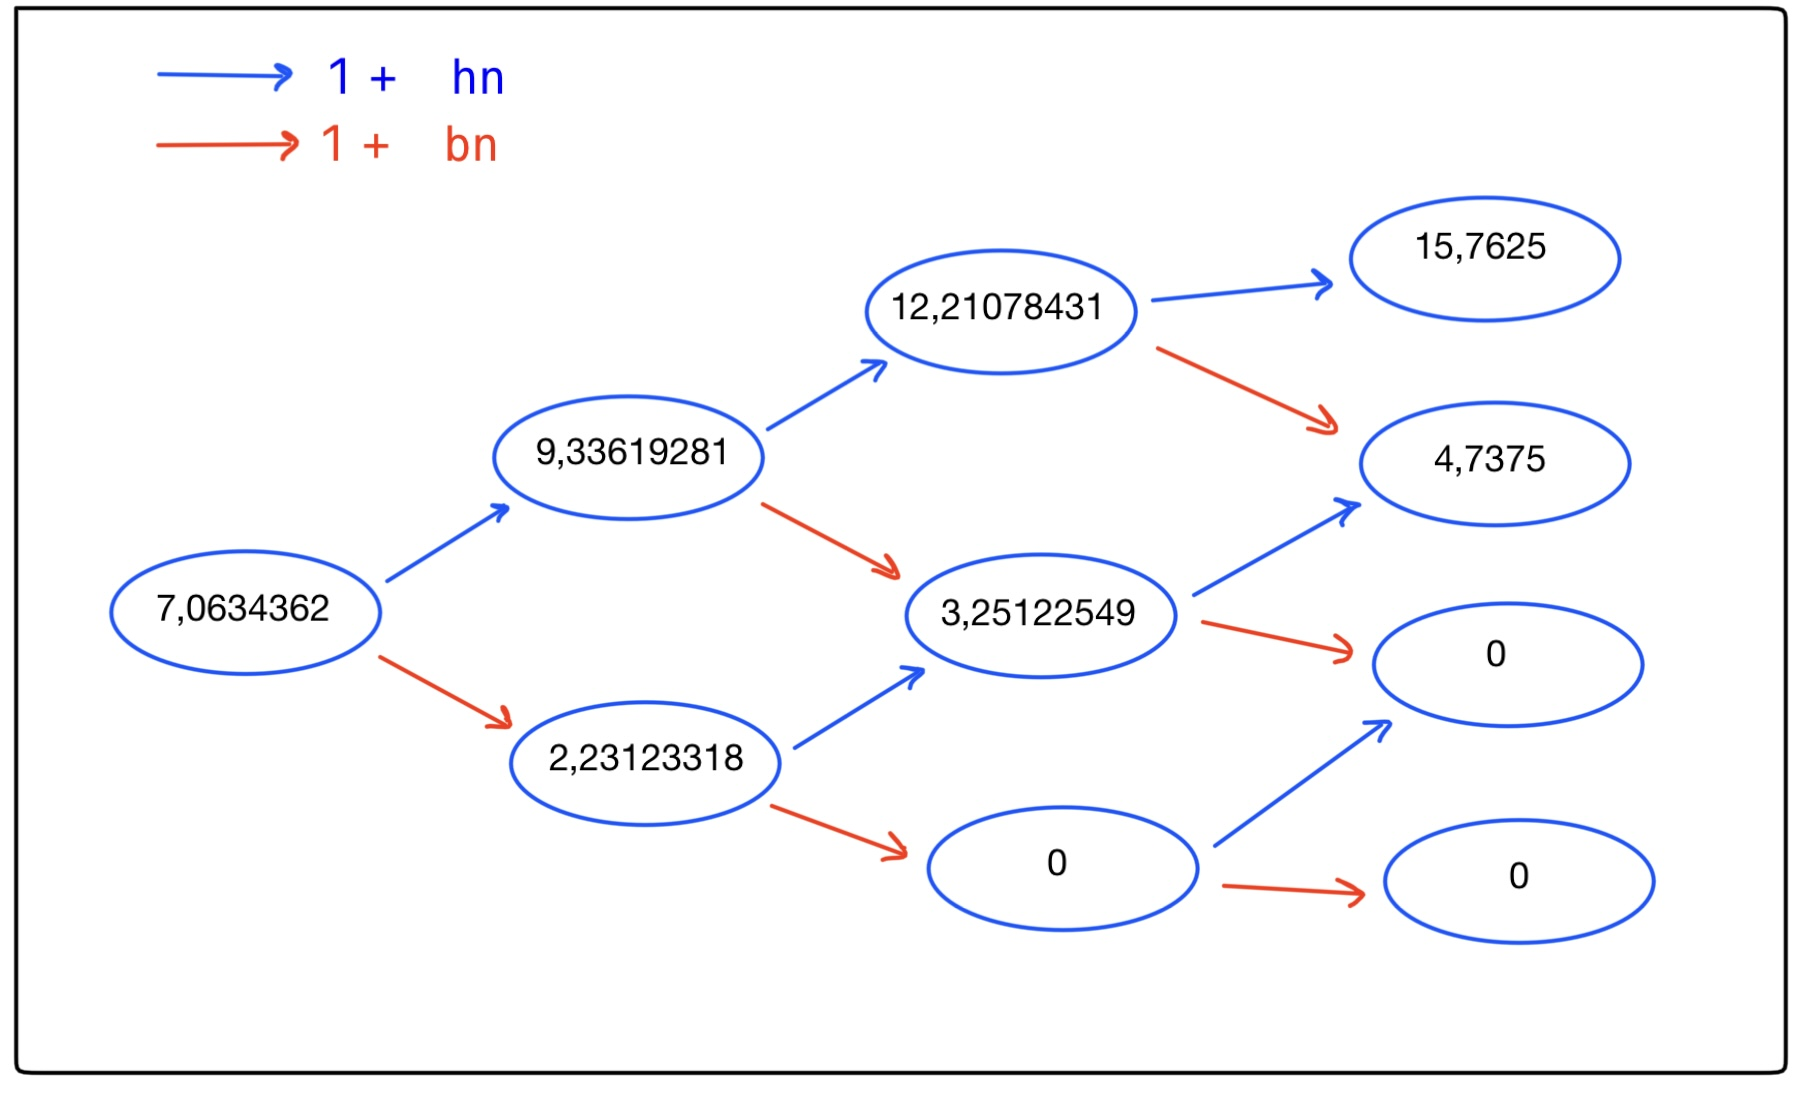

<h3><u> Comparaison des deux pricers</u></h3>

<h5><u>Question 7</u></h5>

<p style="text-align:justify;">
    On va comparer les deux pricers en utilisant les données suivantes :<br> $f(x) = max(x-110,0)$, $s = 100$, $h_{N} = 0.05$, $b_{N} = -0.05$, $r_{N} = 0.02$ et $N$ = alea entre 5 et 15.  <br>
    
</p>

In [13]:
from numpy import random as rd
def f(x):
    return max(x-110,0)


def comparaison(N,rn,hn,bn,s,f):
    a=pricer1(N,rn,hn,bn,s,f)
    b=pricer2(N,rn,hn,bn,s,f)
    return print("pricer 1 = ",a," pricer 2 = ", b)


N=rd.randint(5,15)
rn=0.02
hn=0.05
bn=-0.05
s=100
f=f

x = comparaison(N,rn,hn,bn,s,f)
x



pricer 1 =  4.468784278016522  pricer 2 =  4.468784278016521


<p style="text-align:justify;">
On remarque qu'on obtient le même prix avec les deux pricers, la différence est infime, de l'ordre de $ 10e^{-14} $
</p>

<h3><u> La couverture </u></h3>

<h5><u>Question 8 </u></h5>

<p> 
On note pour simplifier: $ Y_{N} = {S_t}_{N-1}^{N}$. Le système d'équation à résoudre est celui-ci:

$ \left\{
\begin{array}{ll}
 f((1+h_{N})Y_{N}) = \alpha_{N-1}(Y_{N})Y_{N}(1+h_{N})+\beta_{N-1}(Y_{N})(1+r_{N})^{N} \\
 f((1+b_{N})Y_{N}) = \alpha_{N-1}(Y_{N})Y_{N}(1+b_{N})+\beta_{N-1}(Y_{N})(1+r_{N})^{N}
\end{array}
\right.
$
    
<br>
<br>
    
Donc par substitution:
    
$ \left\{
\begin{array}{ll}
 \alpha_{N-1}(Y_{N}) = \frac{f((1+b_{N})Y_{N})-f((1+h_{N})Y_{N})}{Y_{N}(b_{N}-h_{N})}\\
 \beta_{N-1}(Y_{N}) = \frac{f((1+h_{N})Y_{N})(1+b_{N})-f((1+b_{N})Y_{N})(1+h_{N})}{(b_{N}-h_{N})(1+r_{n})^{N}}
\end{array}
\right.
$    
    
</p>

<h5><u>Question 9 </u></h5>

<p>
On note cette fois ci $ Y_{k} = {S_t}_{k-1}^{N}$. Par le même principe on obtient: 

$ \left\{
\begin{array}{ll}
 \alpha_{N-1}(Y_{K}) = \frac{v_{k}((1+b_{N})Y_{k})-v_{k}((1+h_{N})Y_{K})}{Y_{k}(b_{N}-h_{N})}\\
     \beta_{N-1}(Y_{K}) = \frac{v_{k}((1+h_{N})-Y_{k})(1+b_{N})-v_{k}((1+b_{N})Y_{k})(1+h_{N})}{(b_{N}-h_{N})(1+r_{n})^{N}}
\end{array}
\right.
$   
    
    
<p>

<h5><u>Question 10 </u></h5>

In [14]:
def f(x):
    return max(x-100,0)

hn=0.05
bn=-0.05
rn = 0.03
s=100
a = 1+hn
b = 1+bn
c=1/(1+rn)
qN = (rn-bn)/(hn-bn)

v1_hn = c*(f(s*(a**2))*qN+f(s*a*b)*(1-qN))
v1_bn = c*(f(s*a*b)*qN+f(s*(b**2))*(1-qN))

alpha0 = (v1_bn-v1_hn)/(s*(bn-hn))
beta0  = (v1_hn*(1+bn)-v1_bn*(1+hn))/((1+rn)*(bn-hn))
print("alpha0 = ",alpha0," et beta0 = ",beta0)

#Pour s(1+hn)
alpha1 = (f(s*(a**2))-f(s*a*b))/(s*a*(hn-bn))
beta1 = (a*f(s*b*a)-b*f(s*(a**2)))/(((1+rn)**2)*(hn-bn))
print("Pour St1 = (1+hn) on a alpha1 = ",alpha1," et beta1 = ",beta1)

#Pour s(1+bn)
alpha1_bis = (f(s*a*b)-f(s*(b**2)))/(s*b*(hn-bn))
beta1_bis = (a*f(s*(b**2))-b*f(s*a*b))/(((1+rn)**2)*(hn-bn))
print("Pour St1 = (1+bn) on a alpha1 = ",alpha1_bis," et beta1 = ",beta1_bis)

alpha0 =  0.7961165048543688  et beta0 =  -73.42822132151944
Pour St1 = (1+hn) on a alpha1 =  0.9761904761904762  et beta1 =  -91.78527665189932
Pour St1 = (1+bn) on a alpha1 =  0.0  et beta1 =  0.0


<p style="text-align:justify;">
    Concernant la couverture, avec $N = 2$, $s = 100$, $r_{N} = 0.03$, $h_{N} = 0.05$, $b_{N} = −0.05$, $f(x) = max(x − 100, 0)$, on obtient les résultats suivants : 
    <br>
    A la date $T_{0}$ :
    <br>
    <center> $\alpha_{0} = 0.7961$ et $\beta_{0} = -73.4282$  </center>
    <br>
    A la date $T_{1}$ :
    <br>
    <center> $\alpha_{1} = 0.9761$ et $\beta_{1} = -91.7852$ pour $S_{t1} = (1 + h_{n})$ </center>
    <br>
    <center> $\alpha_{1} = 0.0$ et $\beta_{1} = 0.0$ pour $S_{t1} = (1 + b_{n})$ </center>
    
</p>

<h2><center><u>3. Modèle de Black-Scholes </u></center></h2>

<h3><u>Le modèle</u></h3>

<h5><u>Question 11 </u></h5>


<p>
    
On a d $S_{t} = S_{t}(rdt + \sigma dB_{t} (1)$ et $dg(S_{t}) = g'(S_{t})dS_{t}+\frac {\lvert \sigma S_{t} \rvert^2}{2}g''(S_{t})dt (2).  $ 
<br>
On va appliquer (2) à $ln(S_{t}):$
<center> 
$
dg(ln(S_{t}))= \frac {dS_{t}}{S_{t}} + \frac {\lvert \sigma S_{t} \rvert^2}{2} (- \frac {1}{S_{t}^2})dt           
$
 <center>  
$   
  = \frac {dS_{t}}{S_{t}} + \frac {\lvert \sigma^2 d_{t} \rvert^2}{2}   
$
    </center>
$   
  = rdt + \sigma d B_{t} - \frac {\lvert \sigma^2 d_{t} \rvert^2}{2}
$    
 <center> 
$   
 \frac {dS_{t}}{dt} = S_{t}(r - \frac { \sigma^2 }{2} + \sigma \frac {dB_{t}}{ft})
$
</center>
</center>
<br>
On résout maintenant une équation différentielle du premier ordre sachant que $S_{0}(0)= s$.

    
    

La solution est donc $ S_{t}(t)=sexp((r - \frac {\sigma^2}{2})t+\sigma B{t})$.
</p>

<h3><u>Le pricer par la méthode de Monte-Carlo </u></h3>

<h5><u>Question 12 </u></h5>

<p>
Pour coder le pricer_MC on génère les variables aléatoires de loi normale N(0,1) avec la bibliothéque scipy.stats.
</p>

In [2]:
import numpy as np
import math as mt
import scipy.stats as st
import matplotlib.pyplot as plt

def pricer_MC(n,s,r,sig,T,f):
    xi = st.norm.rvs(0,1,n)
    c1 = mt.exp(-r*T)
    c2 = mt.exp(T*((r-(sig**2)/2)))
    c3 = sig*mt.sqrt(T)
    somme = 0
    for i in range(0,n,1):
        c4 = mt.exp(c3*xi[i])
        c = s*(c2*c4)
        somme += f(c)
    return (c1*somme)/n

<h5><u>Question 13 </u></h5>

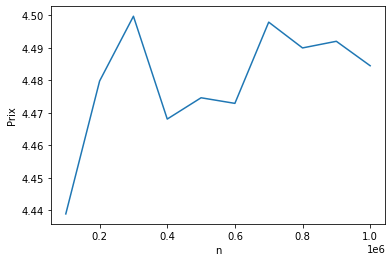

In [119]:
#paramètre du test de la fonction
def f(x):
    return max(x-100,0)
r=0.01
sig=0.1
s=100
T=1
res = np.zeros(10)
n = (10**5)*np.arange(1,11,1)

#on teste la fonction avec les paramètres définis ci-dessus
res = [pricer_MC(i,s,r,sig,T,f) for i in n]

#On affiche un graphique du résultat obtenu par la fonction Pricer_MC
plt.plot(n,res)
plt.xlabel('n')
plt.ylabel('Prix')
plt.show()

<h5><u>Question 14 </u></h5>

<p>
Pour montrer la convergence presque sûr vers p on va utiliser la loi forte des grands nombres (LFGD). Notons:
<br>
<center>$ Z_{i} = exp(-rT)f(s * exp (T(r- \frac {\sigma ** 2}{2}) + \sigma \sqrt{T}\xi_{i})) $. </center>
Montrons l'indépendance des $Z_{i}$. Pour cela on va noter $\psi(\xi_{i})=Z_{i}$ où $\psi$ est une fonction croissante positive. Ainsi, on a:
<br>
<center> $ P(\xi_{i} < xet\xi_{j} < y) = P(\psi(\xi_{i}) < \psi(x)et\psi(\xi_{j}) < \psi(y))$ </center> 
<br>
<center>  $=P(\xi_{i} < x)P(\xi_{j} < y) $ par indépendance des $\xi$</center> 
    
On a donc en composant par $\psi$:
    <center> $ P(\psi(\xi_{i}) < \psi(x)et\psi(\xi_{j}) < \psi(y)) = P(Z_{i} < \psi(x)etZ_{j} < \psi(y))$   
        $= P(\psi(\xi_{i}) < \psi(x))P(\psi(\xi_{j} < \psi(y))$<br> 
         $= Z_{i} < \psi(x)P(Z_{j} < \psi(y) $
    </center> 
Ainsi, les $X_{i}$ sont bien indépendants et identiquement distribués (iid), et on peut appliquer LFGD, ce qui donne:
    <center>
        $ \frac{1}{n}\sum_{i=1}^nX_{i} \Rightarrow E(Z_{i}) $
    </center> 
Or on sait que $B_{t}$ et $\sqrt{T}\xi_{i}$ suivent la loi normale (O,T), donc avec la question 11, on a bien $f(s * exp (T(r- \frac {\sigma ** 2}{2}) + \sigma \sqrt{T}\xi_{i}))$ qui possède la même loi que f($S_{T}$).
<br>    
Ainsi, on a prouvé le résultat souhaité, soit la convergence presque sûr de p(n) vers p.    
</p>

<h3><u>Le pricer par formule fermée </u></h3>

<h5><u>Question 15 </u></h5>

In [4]:
def putBS(s,r,sig,T,K):
    c1 = sig*mt.sqrt(T)
    d = (1/c1)*(mt.log((s/K))+T*(r+(sig**2)/2))
    return -s*st.norm.cdf(-d,0,1)+K*mt.exp(-r*T)*st.norm.cdf(-d+c1,0,1)

<h5><u>Question 16 </u></h5>

In [12]:
#On définit les paramètres de la fonction
r=0.01
sig=0.1
s=100
T=1
K=90

#On applique la fonction
blackScholes = putBS(s,r,sig,T,K)
print("Par la formule de BS, le put vaut",round(blackScholes,4))

Par la formule de BS, le put vaut 0.5815


<h5><u>Question 17 </u></h5>

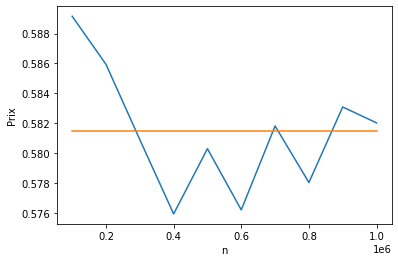

In [106]:
def f(x):
    return max(90-x,0)
r=0.01
sig=0.1
s=100
T=1
res = np.zeros(10)
n = (10**5)*np.arange(1,11,1)

res = [pricer_MC(i,s,r,sig,T,f) for i in n]
bs =[blackScholes for i in range(0,10)]

#graphe de comparaison

plt.plot(n,res)
plt.plot(n,bs)
plt.xlabel('n')
plt.ylabel('Prix')
plt.show()

<p>On remarque que le prix fournir par le pricer Monte Carlo converge vers le prix donné par Black-Scholes. </p>

<h5><u>Question 18 </u></h5>

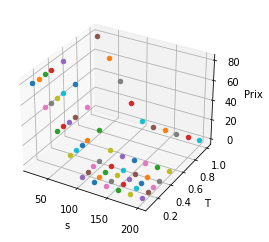

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
s = [20*i for i in range(1,11,1)]
T = [1/12,1/6,1/4,1/3,1/2,1]
r=0.01
sig=0.1
K=100

a=[]
#graphe 3D
fig = figure()
ax = fig.gca(projection='3d')
for i in range(len(s)):
    for j in range(len(T)):
        ax.scatter(s[i],T[j],putBS(s[i],r,sig,T[j],K))

ax.set_xlabel('s')
ax.set_ylabel('T')
ax.set_zlabel('Prix')
plt.show()

<p> On remarque que le modèle est fortement dépendant du nombre d'itérations. </p>

<h2><center><u>4. Convergence des prix </u></center></h2>

<h5><u>Question 19 </u></h5>

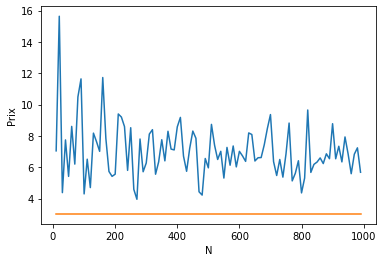

In [120]:
import random as rd
#mouvement brownien
def Bt(T):
    return rd.gauss(0,T)


def S(s,r,sig,t,Bt):
    c1 = (r-(sig**2)/2)*t
    c2 = sig*Bt
    return s*mt.exp(c1+c2)

#fonction max(100-sT,0)    
def sT(t):
    T=1
    s=100
    r=0.02
    sig=0.2
    B=Bt(T)
    return max(100-S(s,r,sig,t,B),0)


N = [10*k for k in range(1,100,1)]
s=100
sigma=0.2
r=0.02
T=1
B = Bt(T)
#definition de rN,hN et bN
rN=[(r*T)/N[i] for i in range(len(N))]
hN=[(((1+rN[i])*mt.exp((sigma*mt.sqrt(T))/mt.sqrt(N[i])))-1) for i in range(len(N))]
bN=[((1+rN[i])*mt.exp(-(sigma*mt.sqrt(T))/mt.sqrt(N[i]))-1) for i in range(len(N))]

    
#liste des prix avec price2
price = [pricer2(N[i],rN[i],hN[i],bN[i],s,sT) for i in range(len(N))]

#liste des prix avec putBS
p = putBS(s,r,sigma,T,K)   
pN = [p for i in range(len(N))]


plt.plot(N,price)
plt.plot(N,pN)
plt.xlabel('N')
plt.ylabel('Prix')
plt.show()

<p> Notre code ne marche pas, on a un problème d'ordre de grandeur entre les deux prix </p>

<h2><center><u>5. EDP de Black-Scholes </u></center></h2>

<h5><u>Question 20 </u></h5>

![explicite.png](explicite.png)

![implicite.png](implicite.png)

![CN.png](CN.png)

In [111]:
import math as mt
import numpy as np

def schema_explicite(M,N,x_min,x_max,sigma,r,k,T):
    res = np.zeros((M,N))
    h = (x_max - x_min)/N
    delta_t = T/M
    for i in range(0,M):
        res[i,0]= k * mt.exp(-r*(i*delta_t)) - mt.exp(x_min)
        res[i,N-1]= 0
    for i in range(0,N):
        res[0,i] = max(k - mt.exp(x_min+(i*h)),0)
    
    for j in range(0,M-1):
        for i in range (1,N-1):
            res[j+1,i]= (1 - (j*delta_t)*r - ((j*delta_t)*(sigma**2))/(h**2)) * res[j,i] + (((j*delta_t)*sigma**2)/(2*h**2) + (r*(j*delta_t))/(2*h) - ((j*delta_t)*(sigma**2))/(4*h)) * res[j,i+1] + (((j*delta_t) * (sigma**2))/(2*(h**2)) + ((j*delta_t) * (sigma**2))/(4*h) -(r*(j*delta_t))/(2*h)) * res[j,i-1]
    return res

N = 100
M=10
k = 0.9
r = 0.015
sigma = 0.21
T = 1
x_min = m.log(0.4)
x_max = m.log(2)
h = (x_max - x_min)/N
delta_t = T/M

explicite = schema_explicite(M,N,x_min,x_max,sigma,r,k,T)

    

In [112]:
##methode implicite
def init_res(K,x_min,x_max,N):
    h = (x_max - x_min) / N
    P=np.zeros(N-1)
    for i in range(N-1):
        x=x_min+i*h
        P[i]=max(K - mt.exp(x),0)
    return P

def schema_implicite(M,N,x_min,x_max,sigma,r,k,T):
    delta_t = T/M
    h = (x_max - x_min) / N
    A=((sigma**2)*delta_t)/(4*h) - (r*delta_t)/(2*h) - ((sigma**2)*delta_t)/(2*(h**2))
    B=1+((sigma**2)*delta_t)/(h**2)
    C=(r*delta_t)/(2*h) - ((sigma**2)*delta_t)/(4*h)  - ((sigma**2)*delta_t)/(2*h**2)
    l=(1-r*delta_t)

    Amat=np.array([A for k in range (N-2)])
    Bmat= np.array([B for k in range (N-1)])
    Cmat=np.array([C for k in range (N-2)])

    Mmat= np.diag(Bmat) + np.diag(Amat,1) + np.diag(Cmat,-1)
    Mmat= np.linalg.inv(Mmat)

    res= init_res(k,x_min,x_max,N)
    i=1
    while (i<M+1):
        t=i*delta_t
        D=np.zeros(N-1)
        D[0]=C* (K * mt.exp(-r*(t+delta_t)) - mt.exp(x_min))
        D[N-2]=0
        res= l*(np.matmul(Mmat,np.add(res,-D)))
        i+=1

    return res

N = 100
M=100
k = 0.9
r = 0.015
sigma = 0.21
T = 1
x_min = m.log(0.4)
x_max = m.log(2)

implicite = schema_implicite(M,N,x_min,x_max,sigma,r,k,T)



In [113]:

import math as mt
def schema_CN(M,N,x_min,x_max,sigma,r,k,T):
    delta_t = T/M
    h = (x_max - x_min) / N
    
    B =((sigma**2*delta_t)/(8*h) - (r*delta_t/(4*h)) - (sigma**2*delta_t)/(4*h**2))
    A =(1 + (sigma**2*delta_t)/(2*h**2))
    C =((r*delta_t)/(4*h) - (sigma**2*delta_t/(8*h)) - (sigma**2*delta_t)/(4*h**2))
    D =(1 - (r*delta_t) - (sigma**2*delta_t)/(2*h**2))
    
    A_tab = np.array([A for k in range(N-1)])
    B_tab =np.array([B for k in range(N-2)])
    C_tab =np.array([C for k in range(N-2)])
    
    B_tab_neg =np.array([-B for k in range(N-2)])
    C_tab_neg =np.array([-C for k in range(N-2)])
    D_tab =np.array([D for k in range(N-1)])
    
    F = np.diag(A_tab) + np.diag(B_tab,1) + np.diag(C_tab,-1)
    G = np.diag(D_tab) + np.diag(B_tab_neg,1) + np.diag(C_tab_neg,-1)
    F = np.linalg.inv(F)
    T = np.matmul(F,G)
    
    res = init_res(k,x_min,x_max,N)
    
    for m in range(1,M+1):
        t_m = delta_t * m
        V = np.zeros(N-1)
        V[0]= -C * (k* mt.exp(-r*t_m) - mt.exp(x_min))
        V[N-2]=0
        U = np.zeros(N-1)
        U[0]= C * (k*mt.exp(-r*(t_m+delta_t)) - mt.exp(x_min))
        U[N-2]=0
        res = np.matmul(T, np.add(res, np.add(-V, -U)))
        
    return res


N = 100
M=10
k = 0.9
r = 0.015
sigma = 0.21
T = 1
CN = schema_CN(M,N,x_min,x_max,sigma,r,k,T)


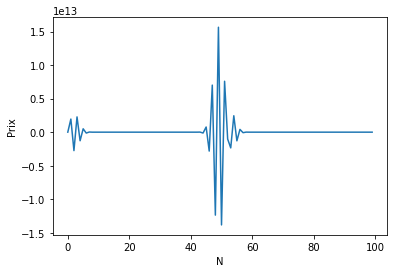

In [70]:
expl=explicite[9,]
Num=[n for n in range(0,100)]
plt.plot(Num,expl)
plt.xlabel('N')
plt.ylabel('Prix')
plt.show()

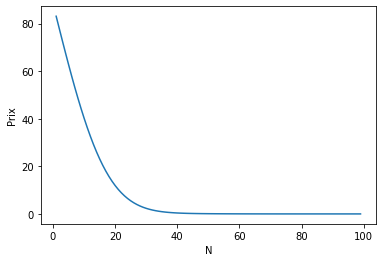

In [92]:
Num=[n for n in range(1,100)]
plt.plot(Num,implicite)
plt.xlabel('N')
plt.ylabel('Prix')
plt.show()

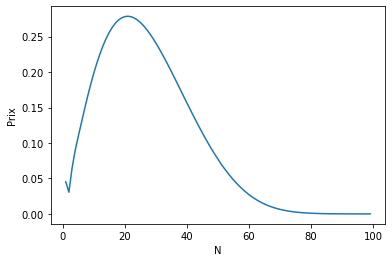

In [90]:
Num=[n for n in range(1,100)]
plt.plot(Num,CN)
plt.xlabel('N')
plt.ylabel('Prix')
plt.show()

<p>Voici ce qu'on otient avec les 3 méthodes. Le résultat obtenu pour le schéma explicite nous amène qu'il y a une erreur, de stabilité ou alors de code. Les deux autres méthodes semblent très bien fonctionner. </p> 